<a href="https://colab.research.google.com/github/farnazmnz/Time-Series-Forecasting/blob/main/1_demand_garanty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('data_demand_garanti.xlsx')

In [ ]:
data

,Unnamed: 0,Date_x,GDS_x,PLN_GROUP_x,QUALITY_F_x,DES_EN_x,YYMM_x,Date & GDS & PLN,Demand,QTY_GARANTY_S
0,0,0,3602006,VP,OEM/GS,TR,140001,OEM/GS-3602006-140001-VP,914,115
1,1,0,3602006,VP,OEM/GS,TR,140206,OEM/GS-3602006-140206-VP,1539,43
2,2,0,3602006,VP,OEM/GS,TR,140205,OEM/GS-3602006-140205-VP,1505,193
3,3,0,3602006,VP,OEM/GS,TR,140204,OEM/GS-3602006-140204-VP,2131,132
4,4,0,3602006,VP,OEM/GS,TR,140203,OEM/GS-3602006-140203-VP,553,158
...,...,...,...,...,...,...,...,...,...,...
2653,2653,108,5402114,SP,OEM/GS,PC,140010,OEM/GS-5402114-140010-SP,93,1
2654,2654,108,5402114,SP,OEM/GS,PC,140009,OEM/GS-5402114-140009-SP,69,2
2655,2655,108,5402114,SP,OEM/GS,PC,140008,OEM/GS-5402114-140008-SP,45,1
2656,2656,108,5402114,SP,OEM/GS,PC,140007,OEM/GS-5402114-140007-SP,9,1


In [ ]:
data['Date_x'].value_counts()

Date_x
0      30
80     30
42     30
46     30
50     30
       ..
32      2
70      1
73      1
103     1
53      1
Name: count, Length: 107, dtype: int64

In [ ]:
dfs = {}

for i in range(0, 103):
    dfs[i] = data[data['Date_x'] == i]

In [ ]:
dfs[80] = dfs[80].sort_values(by='YYMM_x', ascending=True)

In [ ]:
df = dfs[80]

In [ ]:
df = df.drop(columns=['Unnamed: 0' ,'Date_x' ,'GDS_x' ,'PLN_GROUP_x' ,'QUALITY_F_x' ,'DES_EN_x' ,'YYMM_x', 'Date & GDS & PLN'])

In [ ]:
df

,Demand,QTY_GARANTY_S
1912,4224,138
1913,5804,144
1914,4933,164
1915,4447,178
1916,6769,160
1918,7820,179
1925,7837,122
1919,5078,145
1920,12516,188
1921,22610,428


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
df_lstm = df.copy()

In [ ]:
features = df_lstm.drop(columns=['Demand']).values
target = df_lstm['Demand'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=1, kernel_regularizer=l2(0.001)))
model_lstm.add(Activation('linear'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

predictions = model_lstm.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 95718360.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 95716376.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 95714920.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 95713920.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 95712960.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 95712040.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 95711104.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 95710360.0000
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 95709768.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 95709400.0000
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 95708096.0000
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 95706584.0000
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 95705248.0000
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 95704064.0000
Epo

In [ ]:
next_12_data = df_lstm.iloc[-12:].drop(columns=['Demand']).values
next_12_data = np.reshape(next_12_data, (next_12_data.shape[0], 1, next_12_data.shape[1]))
next_12_predictions = model_lstm.predict(next_12_data).flatten()
print("Next 12 Predictions:", next_12_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
Next 12 Predictions: [0.12607765 0.12447542 0.12380762 0.12216701 0.1224152  0.12420557
 0.12593774 0.1258185  0.12587132 0.12578496 0.12524357 0.12002958]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lstm.columns)
df_to_append['Demand'] = next_12_predictions.flatten()
for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0
df_lstm = pd.concat([df_lstm, df_to_append], ignore_index=True)

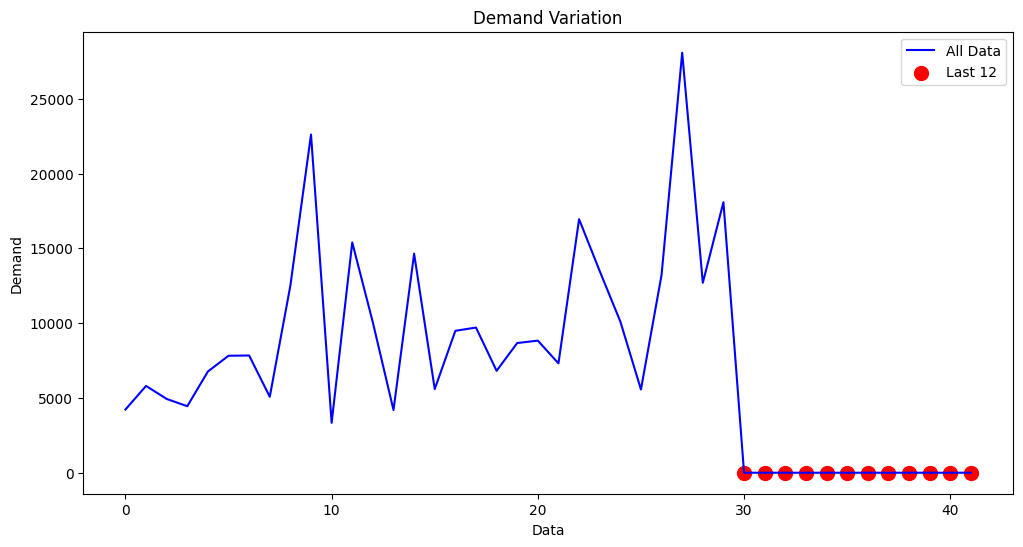

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index, df_lstm['Demand'], label='All Data', color='blue')
plt.scatter(df_lstm.index[-12:], df_lstm['Demand'].tail(12), color='red', label='Last 12', s=100)
plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()
plt.show()

In [ ]:
df_lstm['Percentage Change'] = df_lstm['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lstm['Percentage Change'] >= -tolerance) & (df_lstm['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_lr = df.copy()

In [ ]:
features = df_lr.drop(columns=['Demand'])
target = df_lr['Demand'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 97091269.8689844


In [ ]:
next_12_data = df_lr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_lr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 8640.15625176  9180.1502471   9395.36524525 10244.48623793
 10068.40123945  9262.3232464   8745.80725085  8792.76325044
  8773.19825061  8804.50225034  8964.93524896  8174.50925577]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_lr = pd.concat([df_lr, df_to_append], ignore_index=True)

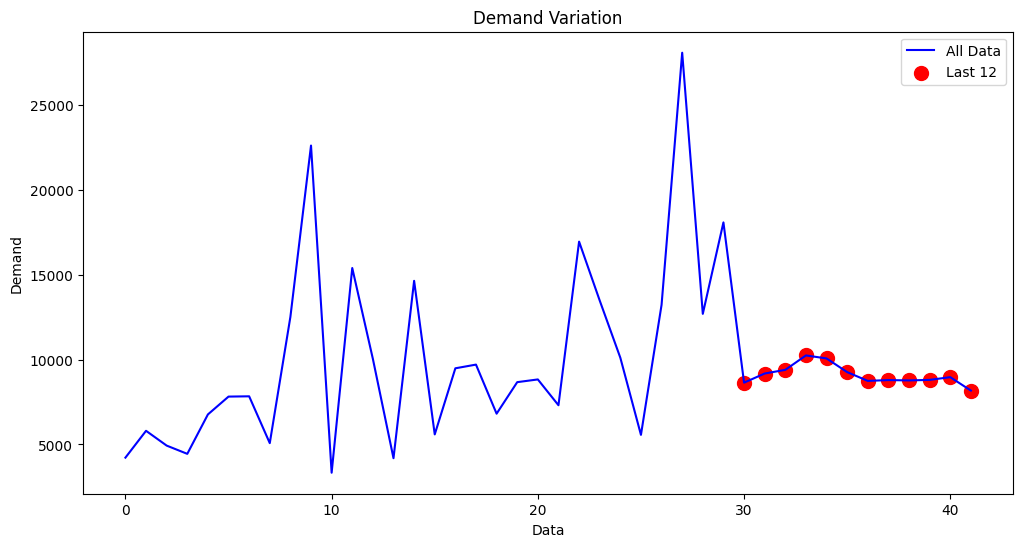

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lr.index, df_lr['Demand'], label='All Data', color='blue')
plt.scatter(df_lr.index[-12:], df_lr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_lr

,Demand,QTY_GARANTY_S
0,4224.000000,138
1,5804.000000,144
2,4933.000000,164
3,4447.000000,178
4,6769.000000,160
5,7820.000000,179
6,7837.000000,122
7,5078.000000,145
8,12516.000000,188
9,22610.000000,428


In [ ]:
df_lr['Percentage Change'] = df_lr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lr['Percentage Change'] >= -tolerance) & (df_lr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


# SVR

In [ ]:
from sklearn.svm import SVR

df_svr = df.copy()

features = df_svr.drop(columns=['Demand'])
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_svr = SVR(kernel='linear')

model_svr.fit(X_train, y_train)

predictions = model_svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 105948294.34060948


In [ ]:
next_12_data = df_svr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_svr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [7819.9        8542.93419689 8831.1        9968.04507772 9732.27305699
 8652.9611399  7961.36321244 8024.2357513  7998.0388601  8039.95388601
 8254.76839378 7196.41398964]


In [ ]:
df_to_append = pd.DataFrame(columns=df_svr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_svr = pd.concat([df_svr, df_to_append], ignore_index=True)

In [ ]:
df_svr

,Demand,QTY_GARANTY_S
0,4224.000000,138
1,5804.000000,144
2,4933.000000,164
3,4447.000000,178
4,6769.000000,160
5,7820.000000,179
6,7837.000000,122
7,5078.000000,145
8,12516.000000,188
9,22610.000000,428


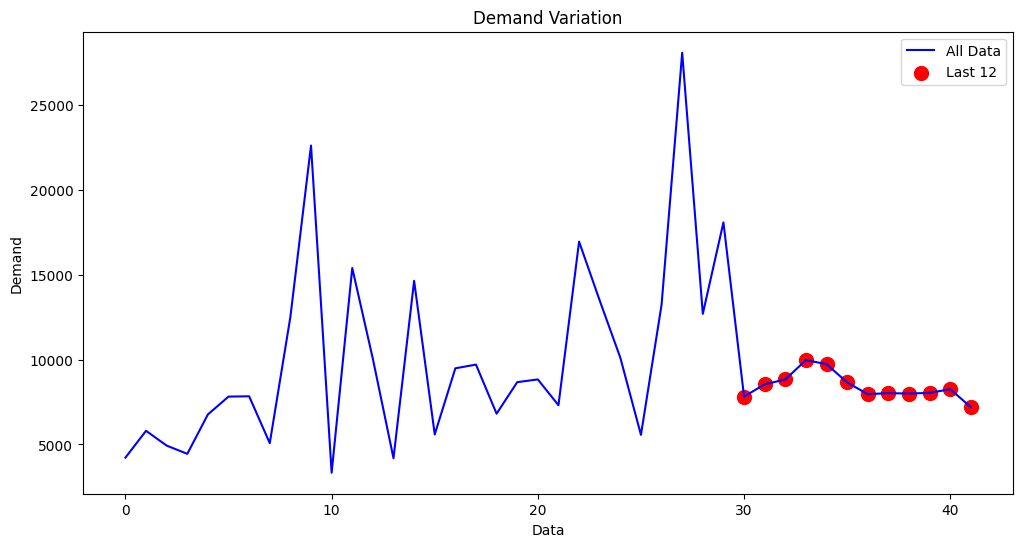

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_svr.index, df_svr['Demand'], label='All Data', color='blue')
plt.scatter(df_svr.index[-12:], df_svr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_svr['Percentage Change'] = df_svr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_svr['Percentage Change'] >= -tolerance) & (df_svr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

df_dt = df.copy()

features = df_svr[['QTY_GARANTY_S']]
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

predictions = model_dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 73766340.56832686


In [ ]:
next_12_data = df_dt.iloc[-12:][['QTY_GARANTY_S']]
next_12_predictions = model_dt.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 7316.5        13480.          8831.          7311.
 16950.         13480.         10110.         28079.
  9596.         28079.         12696.          8516.21336788]


In [ ]:
df_to_append = pd.DataFrame(columns=df_dt.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_dt = pd.concat([df_dt, df_to_append], ignore_index=True)

In [ ]:
df_dt

,Demand,QTY_GARANTY_S
0,4224.000000,138
1,5804.000000,144
2,4933.000000,164
3,4447.000000,178
4,6769.000000,160
5,7820.000000,179
6,7837.000000,122
7,5078.000000,145
8,12516.000000,188
9,22610.000000,428


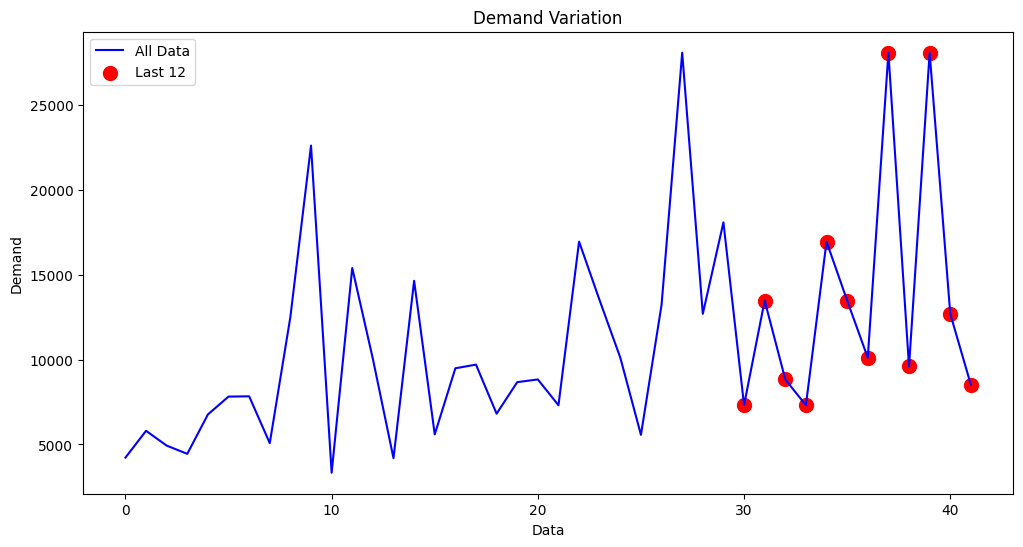

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_dt.index, df_dt['Demand'], label='All Data', color='blue')
plt.scatter(df_dt.index[-12:], df_dt['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_dt['Percentage Change'] = df_dt['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_dt['Percentage Change'] >= -tolerance) & (df_dt['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_rf = df.copy()

features = df_rf.drop(columns=['Demand'])
target = df_rf['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 125638584.15939279


In [ ]:
next_12_data = df_rf.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_rf.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 6854.45283333  9566.14        7735.29        9335.98
 13480.75        8479.69       10351.44233333  7261.096
 11065.176       7261.096      12564.18       14303.87      ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_rf.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_rf = pd.concat([df_rf, df_to_append], ignore_index=True)

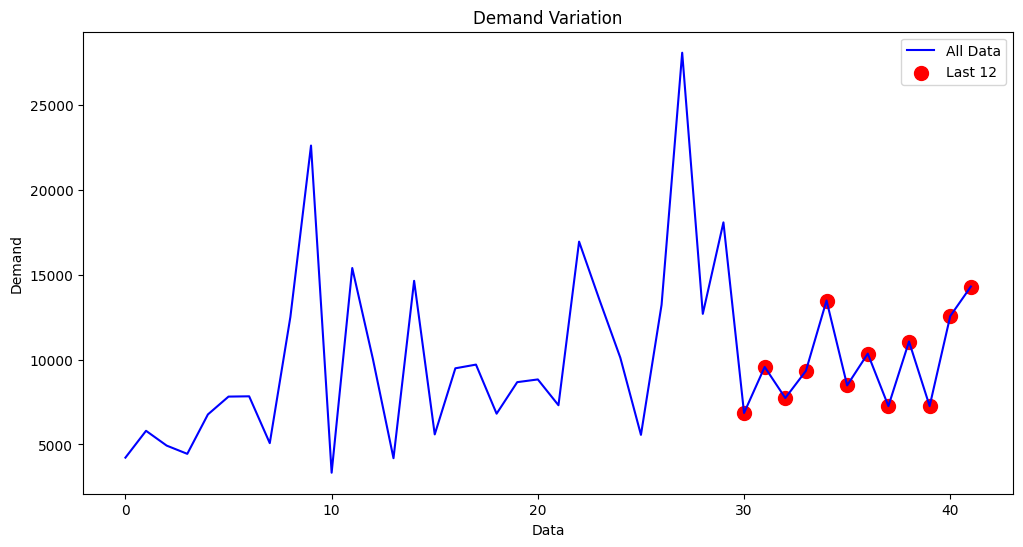

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_rf.index, df_rf['Demand'], label='All Data', color='blue')
plt.scatter(df_rf.index[-12:], df_rf['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_rf['Percentage Change'] = df_rf['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_rf['Percentage Change'] >= -tolerance) & (df_rf['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.
